EDA

In [89]:
import pandas as pd
import numpy as np

# Display all rows
pd.set_option('display.max_rows', None)

# Load the dataset
file_path = 'airbnb_Chicago.csv'
df = pd.read_csv(file_path)
 
# List of columns

columns = [
    'Airbnb Host ID',
    'Airbnb Property ID',
    'superhost_period_all',
    'Scraped Date',
    'Superhost',
    'superhost_change',
    'superhost_change_lose_superhost',
    'superhost_change_gain_superhost',
    'rating_ave_pastYear',
    'numReviews_pastYear',
    'numCancel_pastYear',
    'num_5_star_Rev_pastYear',
    'prop_5_StarReviews_pastYear',
    'numReservedDays_pastYear',
    'numReserv_pastYear',
    'available_days',
    'available_days_aveListedPrice',
    'booked_days',
    'booked_days_avePrice',
    'Property Type',
    'Listing Type',
    'Created Date',
    'Bedrooms',
    'Bathrooms',
    'Neighborhood',
    'Max Guests',
    'Cleaning Fee (USD)',
    'Minimum Stay',
    'Number of Photos',
    'Pets Allowed',
    'Instantbook Enabled',
    'Nightly Rate',
    'Number of Reviews',
    'Rating Overall',
    'revenue',
    'occupancy_rate'
]
 

# Filter the DataFrame
df = df[columns]

# Convert Scraped Date and Created Date columns to datetime
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'], errors='coerce')
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
 
# Get the quarter start of the Scraped Date
# First convert each date to a quarterly period, then get the start time of that period
quarter_start = df['Scraped Date'].dt.to_period('Q').dt.start_time

# Create the property_age column as the difference in days between quarter start and created date
df['property_age_months'] = ((quarter_start.dt.year - df['Created Date'].dt.year) * 12 + (quarter_start.dt.month - df['Created Date'].dt.month))
 
# Set negative property_age_months to 0
df['property_age_months'] = df['property_age_months'].apply(lambda x: max(x, 0))

df.head()

df.to_csv('airbnb_Chicago_selected_columns.csv')

In [113]:
filtered_df = pd.read_csv('airbnb_Chicago_selected_columns.csv')

Checking for nulls

In [114]:
import pandas as pd

# Display all rows
pd.set_option('display.max_rows', None)

# Check missing values again
missing_values = filtered_df.isnull().sum()
missing_percentage = (missing_values / len(filtered_df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_summary.sort_values(by='Percentage', ascending=False))

                                 Missing Values  Percentage
booked_days_avePrice                      38108   31.699344
occupancy_rate                            38108   31.699344
revenue                                   38108   31.699344
booked_days                               38108   31.699344
Cleaning Fee (USD)                        24158   20.095328
rating_ave_pastYear                       19845   16.507649
prop_5_StarReviews_pastYear               19845   16.507649
numReviews_pastYear                       18798   15.636724
numCancel_pastYear                        18798   15.636724
num_5_star_Rev_pastYear                   18798   15.636724
available_days                            15027   12.499896
available_days_aveListedPrice             15027   12.499896
Rating Overall                            14776   12.291107
numReserv_pastYear                         3514    2.923047
numReservedDays_pastYear                   3514    2.923047
Neighborhood                            

In [115]:
# List of columns where null values should be checked
columns_to_check = [
    "booked_days",
    "occupancy_rate",
    "booked_days_avePrice",
    "revenue",
    "rating_ave_pastYear",
    "prop_5_StarReviews_pastYear",
    "numReviews_pastYear",
    "numCancel_pastYear",
    "num_5_star_Rev_pastYear",
    "available_days",
    "available_days_aveListedPrice",
    "Neighborhood",
    
]

# Drop rows where any of the specified columns have null values
filtered_df = filtered_df.dropna(subset=columns_to_check)

In [116]:
import pandas as pd

# Display all rows
pd.set_option('display.max_rows', None)

# Check missing values again
missing_values = filtered_df.isnull().sum()
missing_percentage = (missing_values / len(filtered_df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_summary.sort_values(by='Percentage', ascending=False))

                                 Missing Values  Percentage
Cleaning Fee (USD)                        10215   14.162519
Rating Overall                             3850    5.337807
numReserv_pastYear                           55    0.076254
numReservedDays_pastYear                     55    0.076254
Bathrooms                                    17    0.023570
Number of Reviews                            10    0.013864
Bedrooms                                      9    0.012478
Max Guests                                    3    0.004159
Number of Photos                              3    0.004159
Unnamed: 0                                    0    0.000000
Created Date                                  0    0.000000
Neighborhood                                  0    0.000000
Minimum Stay                                  0    0.000000
Property Type                                 0    0.000000
Pets Allowed                                  0    0.000000
Instantbook Enabled                     

In [117]:
from sklearn.experimental import enable_iterative_imputer  # Required to enable IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import HistGradientBoostingRegressor

# Columns to impute
columns_to_impute = [
    "Cleaning Fee (USD)",
    "Rating Overall",
    "numReserv_pastYear",
    "numReservedDays_pastYear",
    "Bathrooms",
    "Number of Reviews",
    "Bedrooms",
    "Max Guests",
    "Number of Photos"
]

# Initialize IterativeImputer with HistGradientBoostingRegressor
imputer = IterativeImputer(estimator=HistGradientBoostingRegressor(), max_iter=20, random_state=0)

# Apply imputation only on the selected columns
df_imputed = filtered_df.copy()
df_imputed[columns_to_impute] = imputer.fit_transform(df_imputed[columns_to_impute])

df_imputed = df_imputed.drop(columns=["Unnamed: 0"]) 


/Users/vishnuanand/Library/Python/3.9/lib/python/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [122]:
# Check the shape of the DataFrame
num_rows, num_columns = df_imputed.shape

print(f"The DataFrame has {num_rows} rows and {num_columns} columns.")

The DataFrame has 72127 rows and 37 columns.


In [123]:
import pandas as pd

# Display all rows
pd.set_option('display.max_rows', None)

# Check missing values again
missing_values = df_imputed.isnull().sum()
missing_percentage = (missing_values / len(df_imputed)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_summary.sort_values(by='Percentage', ascending=False))

                                 Missing Values  Percentage
Airbnb Host ID                                0         0.0
Property Type                                 0         0.0
Created Date                                  0         0.0
Bedrooms                                      0         0.0
Bathrooms                                     0         0.0
Neighborhood                                  0         0.0
Max Guests                                    0         0.0
Cleaning Fee (USD)                            0         0.0
Minimum Stay                                  0         0.0
Number of Photos                              0         0.0
Pets Allowed                                  0         0.0
Instantbook Enabled                           0         0.0
Nightly Rate                                  0         0.0
Number of Reviews                             0         0.0
Rating Overall                                0         0.0
revenue                                 

Outlier handling

/var/folders/66/kjdgfk_530v31znwf93fdr6h0000gn/T/ipykernel_32445/1448499658.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/66/kjdgfk_530v31znwf93fdr6h0000gn/T/ipykernel_32445/1448499658.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/66/kjdgfk_530v31znwf93fdr6h0000gn/T/ipykernel_32445/1448499658.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/66/kjdgfk_530v31znwf93fdr6h0000gn/T/ipykernel_32445/1448499658.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

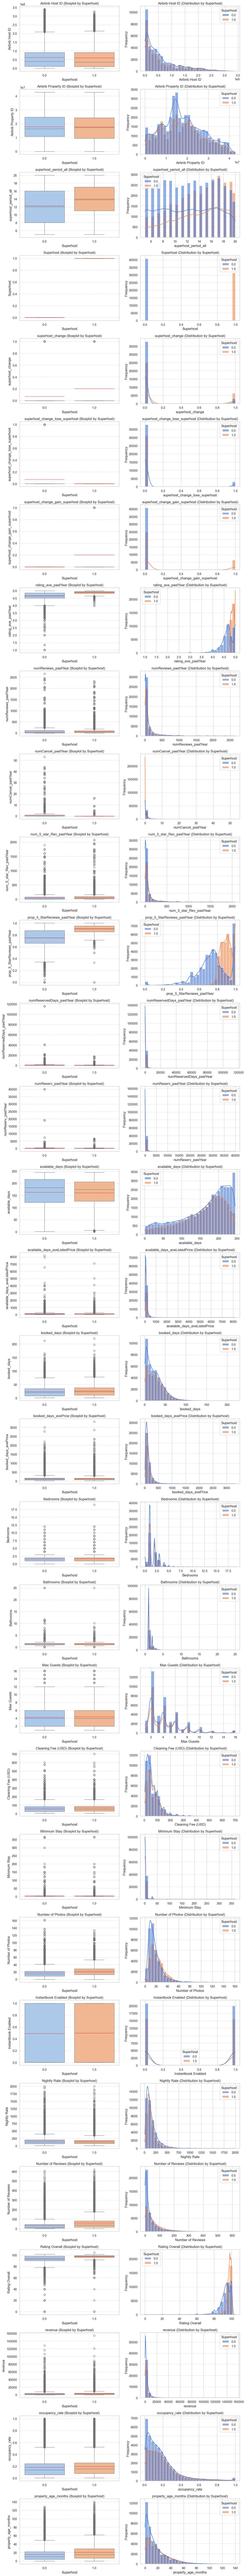

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Set a visual theme
sns.set_theme(style="whitegrid")

# Get numerical columns
numerical_columns = df_imputed.select_dtypes(include='number').columns

# Determine the grid size
n_cols = 2  # Boxplot and histogram for each variable
n_rows = len(numerical_columns)  # One row per variable

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
if n_rows == 1:  # Ensure axes are iterable for a single numerical column
    axes = [axes]

# Plot each numerical column
for i, column in enumerate(numerical_columns):
    # Boxplot grouped by Superhost
    sns.boxplot(
        x='Superhost',
        y=column,
        data=df_imputed,
        ax=axes[i][0],
        palette="pastel",
        showmeans=True,
        meanline=True,
        meanprops={"color": "red", "linestyle": "--"}
    )
    axes[i][0].set_title(f'{column} (Boxplot by Superhost)', fontsize=12)
    axes[i][0].set_xlabel('Superhost')
    axes[i][0].set_ylabel(column)
    axes[i][0].grid(axis="y", linestyle="--", alpha=0.7)
    
    # Histogram grouped by Superhost
    sns.histplot(
        data=df_imputed,
        x=column,
        hue='Superhost',
        kde=True,
        ax=axes[i][1],
        bins=30,
        palette="muted",
        alpha=0.6
    )
    axes[i][1].set_title(f'{column} (Distribution by Superhost)', fontsize=12)
    axes[i][1].set_xlabel(column)
    axes[i][1].set_ylabel('Frequency')
    axes[i][1].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Correlation Analysis

Excluded Correlations (|corr| > 0.9):
rating_ave_pastYear          prop_5_StarReviews_pastYear    0.915139
numReviews_pastYear          num_5_star_Rev_pastYear        0.988101
num_5_star_Rev_pastYear      numReviews_pastYear            0.988101
prop_5_StarReviews_pastYear  rating_ave_pastYear            0.915139
numReservedDays_pastYear     numReserv_pastYear             0.927123
numReserv_pastYear           numReservedDays_pastYear       0.927123
dtype: float64


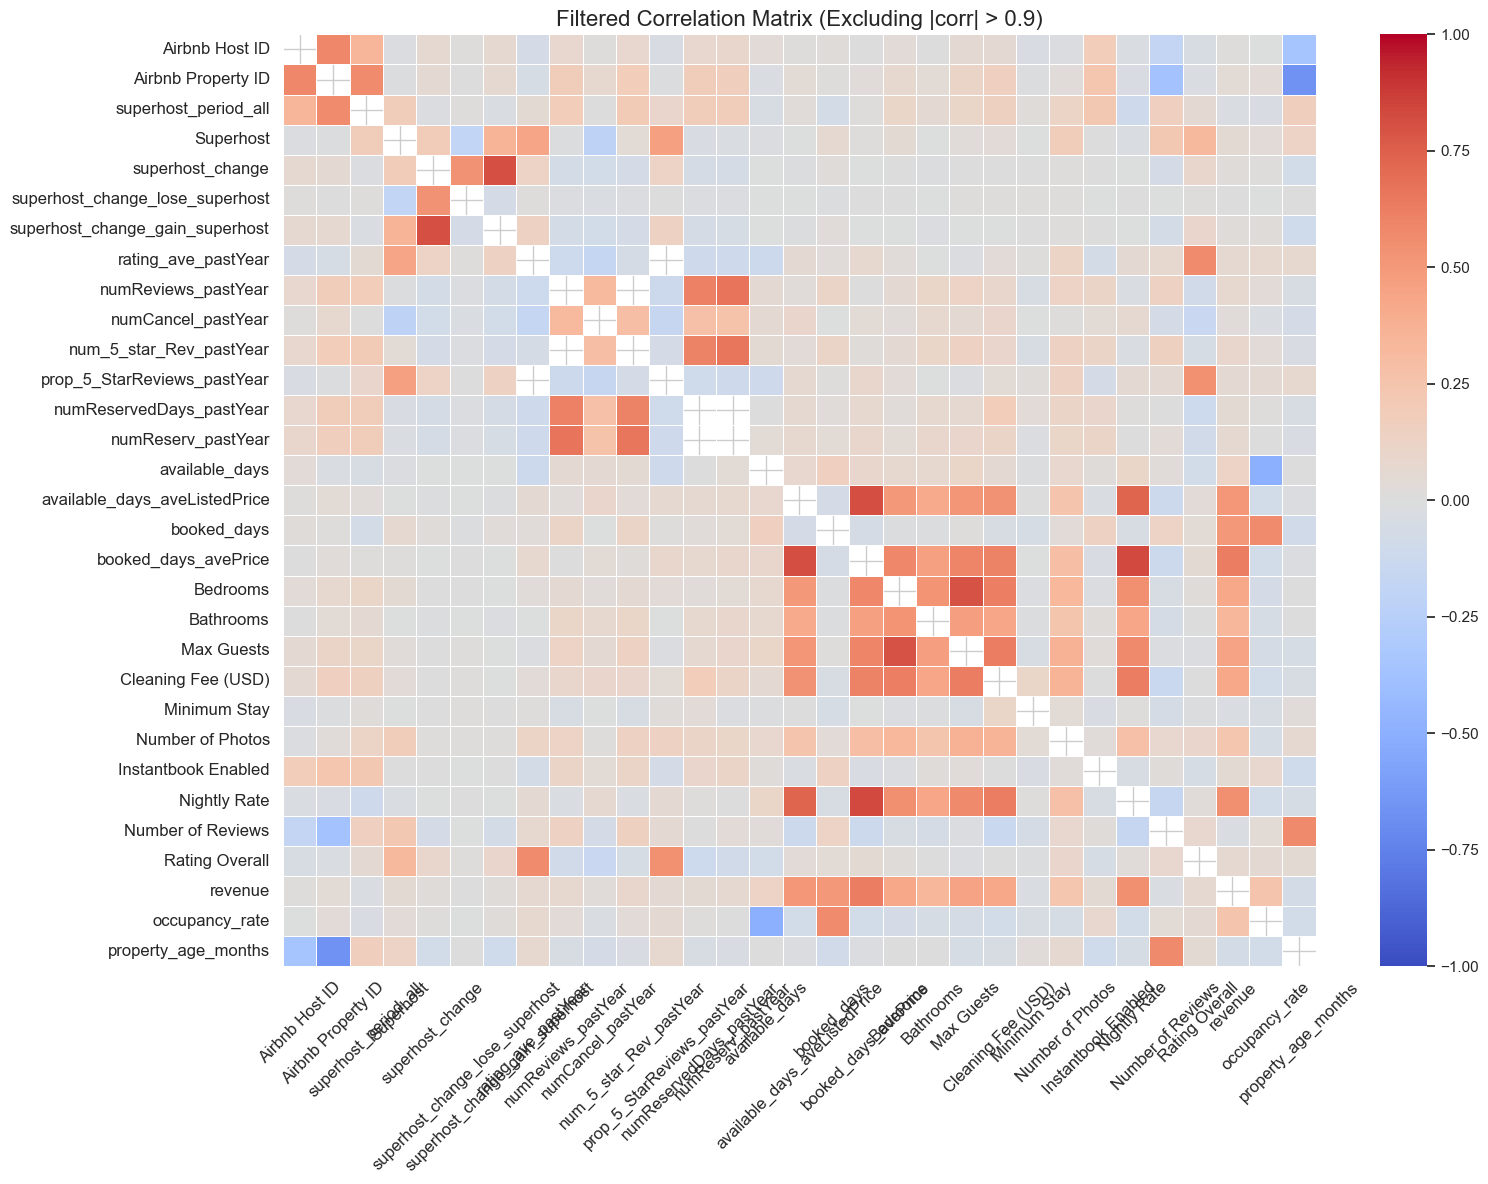

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select only numerical columns
numerical_columns = df_imputed.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Identify correlations greater than 0.9 or less than -0.9
excluded_correlations = correlation_matrix[
    (correlation_matrix >= 0.9) | (correlation_matrix <= -0.9)
].stack()

# Exclude self-correlations
excluded_correlations = excluded_correlations[excluded_correlations.index.get_level_values(0) != excluded_correlations.index.get_level_values(1)]

# Print excluded correlations
print("Excluded Correlations (|corr| > 0.9):")
print(excluded_correlations)

# Mask correlations greater than 0.9 or less than -0.9 for heatmap
filtered_matrix = correlation_matrix.where((correlation_matrix < 0.9) & (correlation_matrix > -0.9))

# Plot the filtered correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(
    filtered_matrix,
    cmap="coolwarm",   # Color map
    vmin=-1, vmax=1,   # Range of correlations
    linewidths=0.5,    # Line width between cells
    cbar=True          # Show color bar
)
plt.title("Filtered Correlation Matrix (Excluding |corr| > 0.9)", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

Exporting to csv

In [127]:
# Export df_imputed to a CSV file
df_imputed.to_csv("chicago_preprocessed.csv", index=False)

print("DataFrame successfully exported to 'chicago_preprocessed.csv'.")

DataFrame successfully exported to 'chicago_preprocessed.csv'.


In [128]:
print(df_imputed.isnull().sum())

Airbnb Host ID                     0
Airbnb Property ID                 0
superhost_period_all               0
Scraped Date                       0
Superhost                          0
superhost_change                   0
superhost_change_lose_superhost    0
superhost_change_gain_superhost    0
rating_ave_pastYear                0
numReviews_pastYear                0
numCancel_pastYear                 0
num_5_star_Rev_pastYear            0
prop_5_StarReviews_pastYear        0
numReservedDays_pastYear           0
numReserv_pastYear                 0
available_days                     0
available_days_aveListedPrice      0
booked_days                        0
booked_days_avePrice               0
Property Type                      0
Listing Type                       0
Created Date                       0
Bedrooms                           0
Bathrooms                          0
Neighborhood                       0
Max Guests                         0
Cleaning Fee (USD)                 0
M